In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Create a Set of Random Latitiude and Longitude Combinations to use: 

In [2]:
# Create a set of random latitiude and longitude combinations:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size =1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add lat and lngs to a list. can only unzip list once before removed from computer meory
coordinates = list(lat_lngs)

### Find Cities Closest to Randomly Found Latitiude and Longitude:

In [4]:
# use the citipy module to determine city based on long and lat
from citipy import citipy

In [5]:
# create a list for holding the cities
cities = []

# Identify the nearest cities for each lat and long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add to the cities list
    if city not in cities:
        cities.append(city)
        
# print the city count. Note the citipy module finds cities with population of 500 or more
len(cities)

637

### Get Data for All Cities using API and JSON

In [6]:
# import the requests library
import requests

# import the API key
from config import weather_api_key

In [9]:
#weather_api_key

In [11]:
# starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Import the datetime module from the datetime library
from datetime import datetime

In [13]:
# Initialize counters and an empty list that will hold weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group the cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1    

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1 

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | zhigansk
Processing Record 3 of Set 1 | vardo
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | gurgan
City not found. Skipping...
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | ranong
Processing Record 9 of Set 1 | huarmey
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | tual
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | port hedland
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | locri
Processing Record 17 of Set 1 | lolua
City not found. Skipping...
Processing Record 18 of Set 1 | kyra
Processing Record 19 of Set 1 | leningradskiy
Processing Record 20 of Set 1 | saldanha
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | hav

Processing Record 36 of Set 4 | campos novos
Processing Record 37 of Set 4 | taoudenni
Processing Record 38 of Set 4 | bubaque
Processing Record 39 of Set 4 | cukai
Processing Record 40 of Set 4 | saint george
Processing Record 41 of Set 4 | dongsheng
Processing Record 42 of Set 4 | ambon
Processing Record 43 of Set 4 | provideniya
Processing Record 44 of Set 4 | fort nelson
Processing Record 45 of Set 4 | ponta do sol
Processing Record 46 of Set 4 | baruun-urt
Processing Record 47 of Set 4 | kaitangata
Processing Record 48 of Set 4 | nanortalik
Processing Record 49 of Set 4 | sembe
Processing Record 50 of Set 4 | portland
Processing Record 1 of Set 5 | xai-xai
Processing Record 2 of Set 5 | jamestown
Processing Record 3 of Set 5 | pemba
Processing Record 4 of Set 5 | chumikan
Processing Record 5 of Set 5 | solsvik
City not found. Skipping...
Processing Record 6 of Set 5 | villarrubia de los ojos
Processing Record 7 of Set 5 | waitati
Processing Record 8 of Set 5 | georgetown
Processin

Processing Record 23 of Set 8 | tari
Processing Record 24 of Set 8 | rumonge
Processing Record 25 of Set 8 | asau
Processing Record 26 of Set 8 | jawhar
Processing Record 27 of Set 8 | turukhansk
Processing Record 28 of Set 8 | groa
Processing Record 29 of Set 8 | maragogi
Processing Record 30 of Set 8 | taitung
Processing Record 31 of Set 8 | libenge
Processing Record 32 of Set 8 | kununurra
Processing Record 33 of Set 8 | rungata
City not found. Skipping...
Processing Record 34 of Set 8 | paranhos
Processing Record 35 of Set 8 | labrea
Processing Record 36 of Set 8 | monopoli
Processing Record 37 of Set 8 | hauterive
Processing Record 38 of Set 8 | gorlice
Processing Record 39 of Set 8 | champerico
Processing Record 40 of Set 8 | winder
Processing Record 41 of Set 8 | lorengau
Processing Record 42 of Set 8 | buin
Processing Record 43 of Set 8 | katherine
Processing Record 44 of Set 8 | wajima
Processing Record 45 of Set 8 | basoko
Processing Record 46 of Set 8 | garowe
Processing Rec

Processing Record 16 of Set 12 | omboue
Processing Record 17 of Set 12 | obihiro
Processing Record 18 of Set 12 | sur
Processing Record 19 of Set 12 | san vicente
Processing Record 20 of Set 12 | sudak
Processing Record 21 of Set 12 | lazaro cardenas
Processing Record 22 of Set 12 | bandarbeyla
Processing Record 23 of Set 12 | villa bruzual
Processing Record 24 of Set 12 | alugan
Processing Record 25 of Set 12 | kutum
Processing Record 26 of Set 12 | longyearbyen
Processing Record 27 of Set 12 | karasburg
Processing Record 28 of Set 12 | vitre
Processing Record 29 of Set 12 | alofi
Processing Record 30 of Set 12 | tautira
Processing Record 31 of Set 12 | along
Processing Record 32 of Set 12 | po
City not found. Skipping...
Processing Record 33 of Set 12 | olafsvik
Processing Record 34 of Set 12 | maple creek
Processing Record 35 of Set 12 | pondicherry
Processing Record 36 of Set 12 | piripiri
Processing Record 37 of Set 12 | maniitsoq
Processing Record 38 of Set 12 | lugovoy
Processin

In [14]:
len(city_data)

589

### Create a DataFrame to hold all cities

In [15]:
# 8. Convert the list to a DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.49,68,0,8.10,PF,2021-07-15 00:38:03
1,Zhigansk,66.7697,123.3711,55.06,41,5,12.06,RU,2021-07-15 00:42:40
2,Vardo,70.3705,31.1107,49.53,91,100,1.19,NO,2021-07-15 00:42:40
3,Tiksi,71.6872,128.8694,42.84,67,95,19.10,RU,2021-07-15 00:42:40
4,Albany,42.6001,-73.9662,74.14,94,0,3.29,US,2021-07-15 00:42:41
5,Ranong,9.9658,98.6348,76.93,87,97,6.55,TH,2021-07-15 00:42:41
6,Huarmey,-10.0681,-78.1522,64.53,83,46,11.34,PE,2021-07-15 00:42:41
7,Bluff,-46.6000,168.3333,46.80,62,100,8.21,NZ,2021-07-15 00:42:41
8,Tual,-5.6667,132.7500,80.47,84,100,17.27,ID,2021-07-15 00:42:42
9,Kodiak,57.7900,-152.4072,56.71,67,1,5.75,US,2021-07-15 00:42:42


In [16]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-07-15 00:38:03,-23.1203,-134.9692,73.49,68,0,8.10
1,Zhigansk,RU,2021-07-15 00:42:40,66.7697,123.3711,55.06,41,5,12.06
2,Vardo,NO,2021-07-15 00:42:40,70.3705,31.1107,49.53,91,100,1.19
3,Tiksi,RU,2021-07-15 00:42:40,71.6872,128.8694,42.84,67,95,19.10
4,Albany,US,2021-07-15 00:42:41,42.6001,-73.9662,74.14,94,0,3.29
5,Ranong,TH,2021-07-15 00:42:41,9.9658,98.6348,76.93,87,97,6.55
6,Huarmey,PE,2021-07-15 00:42:41,-10.0681,-78.1522,64.53,83,46,11.34
7,Bluff,NZ,2021-07-15 00:42:41,-46.6000,168.3333,46.80,62,100,8.21
8,Tual,ID,2021-07-15 00:42:42,-5.6667,132.7500,80.47,84,100,17.27
9,Kodiak,US,2021-07-15 00:42:42,57.7900,-152.4072,56.71,67,1,5.75


### Create a CSV from the DataFrame

In [17]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

### Extract data and create Scatter Plots

In [18]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

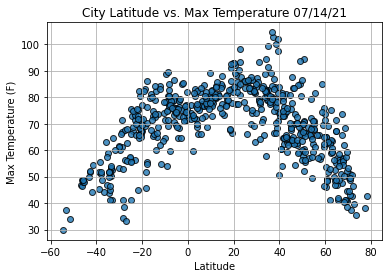

In [19]:
# Import the time module
import time

# Build the scatter plot for latitude vs max temp
plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

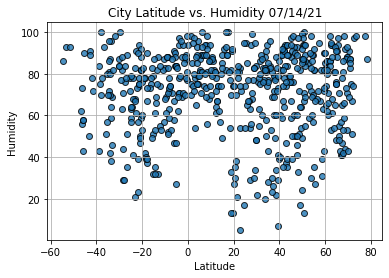

In [20]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats, humidity, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

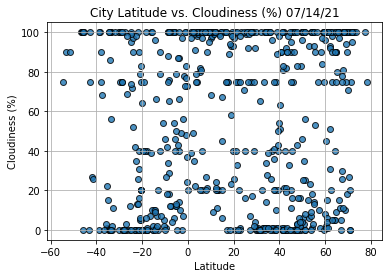

In [21]:
# Build the scatter plot for latitude vs cloudiness
plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

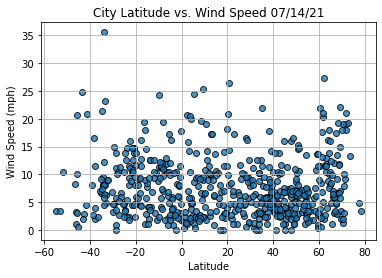

In [22]:
# Build the scatter plot for latitude vs wind speed
plt.scatter(lats, wind_speed, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

### Create Linear Regression Models

In [58]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.show()

In [59]:
# Create a Northern Hemisphere DataFrame from city_data_df. Use loc method to access the correct row index
index13 = city_data_df.loc[13]
index13

City                        Locri
Country                        IT
Date          2021-07-15 00:42:43
Lat                       38.2414
Lng                       16.2623
Max Temp                    77.58
Humidity                       78
Cloudiness                      0
Wind Speed                  17.87
Name: 13, dtype: object

In [60]:
# Filter the DataFrame based on lat above or below 0 to create northern and southern hemisphere
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

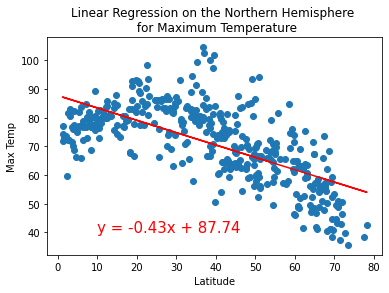

The r-value is: -0.665


In [80]:
# Perform Linear Regression on the Max Temp for the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,40))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

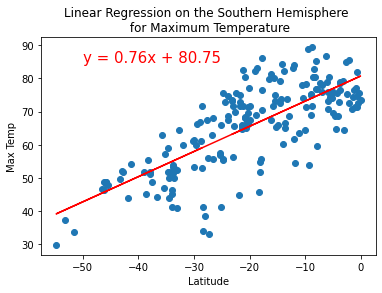

The r-value is: 0.758


In [81]:
# Perform Linear Regression on the Max Temp for the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50,85))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

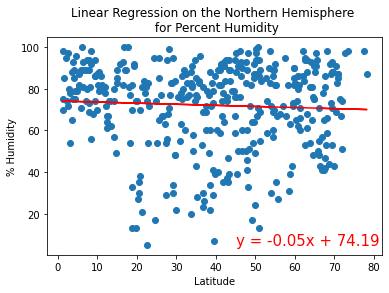

The r-value is: -0.053


In [85]:
# Perform Linear Regression on the Percent Humidity for the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Percent Humidity', '% Humidity', (45,5))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

Finding: The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. 

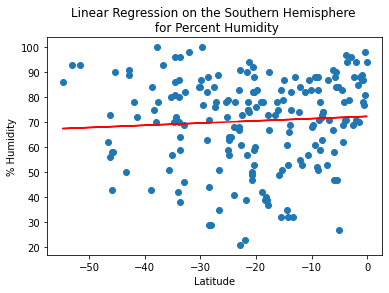

The r-value is: 0.064


In [86]:
# Perform Linear Regression on the Percent Humidity for the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Percent Humidity', '% Humidity', (-50,15))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

Finding: The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

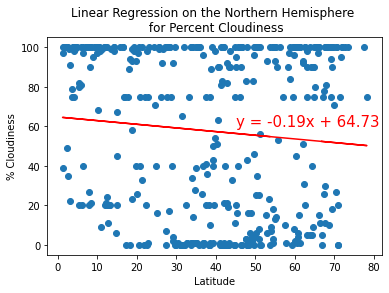

The r-value is: -0.092


In [88]:
# Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Percent Cloudiness', '% Cloudiness', (45,60))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

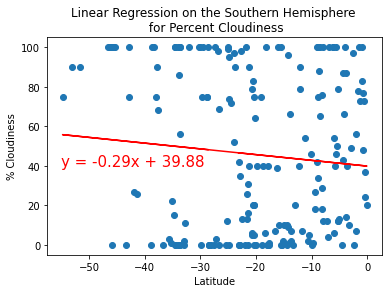

The r-value is: -0.094


In [91]:
# Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Percent Cloudiness', '% Cloudiness', (-55,40))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

Finding: The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness.

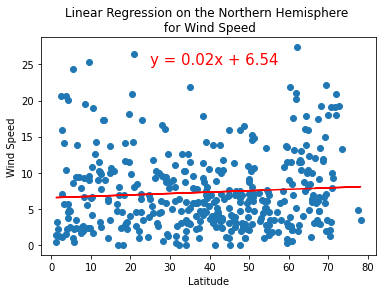

The r-value is: 0.074


In [93]:
# Perform Linear Regression on the Wind Speed for the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed', (25,25))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

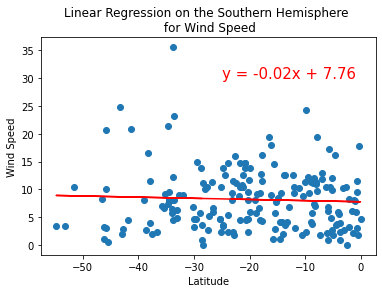

The r-value is: -0.050


In [96]:
# Perform Linear Regression on the Wind Speed for the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-25,30))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

Finding: The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed.